The data and data loading codes are from https://www.kaggle.com/kogilvie/simple-perceptron-classifier

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
train = pd.read_csv("datasets/perceptrons/train.csv")
test  = pd.read_csv("datasets/perceptrons/test.csv")

In [7]:
train

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
0           0  ...         0         0         0         0         0   
1           0  ...         0         0         0         0         0   
2           0  ...         0         0         0         0         0   
3           0  ...         0         0         0         0         0   
4           0  ...         0         0         0         0         0   
...       ...  ...       ...       ...       ...       ...       ...   
41995       0  ...         0         0         0         0         0   
41996       0  ...         0         0         0         0         0   
41997       0  ...         0         0         0         0         0   
41998       0  ...         0         0         0         0         0   
41999       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
0             0         0         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3             0         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
41995         0         0         0         0         0  
41996         0         0         0         0         0  
41997         0         0         0         0         0  
41998         0         0         0         0         0  
41999         0         0         0         0         0  

[42000 rows x 785 columns]

A sample digit from the dataset:


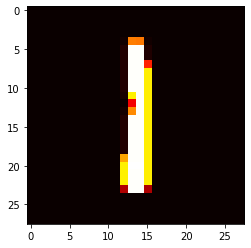

In [125]:
trainlabels = train.label

# Store the data in a matrix (without labels)
traindata = [r.T / 256. for r in np.asmatrix(train.loc[:,'pixel0':])]

# Visualize a single digit (one row from the training data matrix)
samplerow = traindata[2]#get one row from training data
samplerow = np.reshape(samplerow,(28,28))#reshape it to a 28*28 grid
print("A sample digit from the dataset:")
plt.imshow(samplerow, cmap="hot")


In [126]:
w = np.zeros((784,1))

In [40]:
np.matmul(w.T, traindata[0])

matrix([[0.]])

In [113]:
def predict(w, x):
    if np.matmul(w.T, x) >= 0:
        return 1
    else:
        return -1

In [131]:
w = np.zeros((784 + 1,1))
target = 4
for e in range(20):
    errors = 0
    for x,label in zip(traindata, trainlabels):
        if label == target:
            y = 1
        else:
            y = -1
        x = np.append(x,[[1]],axis=0)
        yhat = predict(w,x)
        if y != yhat:
            w += (x*y)
            errors += 1
    print(errors/len(traindata))

0.03430952380952381
0.027595238095238096
0.026642857142857142
0.026333333333333334
0.026
0.025214285714285713
0.02457142857142857
0.025285714285714286
0.02388095238095238
0.024333333333333332
0.024333333333333332
0.02438095238095238
0.024428571428571428
0.02395238095238095
0.024166666666666666
0.02419047619047619
0.023976190476190477
0.023047619047619046
0.023166666666666665
0.023523809523809523


### kernelized

In [135]:
def k(x,y):
    return (np.matmul(x.T,y) + 1)**5

def k(x,y):
    return np.matmul(x.T,y)



In [136]:
def kpredict(ws,x):
    val = sum([c*k(w,x) for w,c in ws])
    if val >= 0:
        return 1
    else:
        return -1

In [ ]:
ws = []
target = 4
for e in range(10):
    errors = 0
    c = 0
    for x,label in zip(traindata, trainlabels):
        if label == target:
            y = 1
        else:
            y = -1
        yhat = kpredict(ws,x)
        if y != yhat:
            ws.append((x,y))                 #  w' <- w' + phi(x)*y
            errors += 1
        c += 1
        
        if c % 1000 == 0:
            print(c,len(ws))
    print(errors/len(traindata))

1000 82
2000 134
3000 168
4000 209
5000 235
6000 259
7000 301
8000 347
9000 375
10000 416
11000 448
12000 472
13000 516
14000 541
15000 585
16000 621
17000 658
18000 700
19000 725
20000 751
21000 782
22000 818
23000 846


In [103]:
k(traindata[0],traindata[1])

matrix([[3447214265366174367]])

In [104]:
np.matmul(traindata[0].T,traindata[1])

matrix([[1510622]])

In [111]:
max(traindata[0])

matrix([[256]])